CE49X – Lab 5: Bias–Variance Tradeoff using the Air Quality Dataset
Course: CE49X – Introduction to Computational Thinking and Data Science for Civil Engineers

Instructor: Dr. Eyuphan Koç

Semester: Fall 2025

Lab Duration: 1 week

Dataset: UCI Air Quality Dataset

Libraries successfully loaded.

--- Step 1: Data Loading and Preparation ---
Dataset successfully loaded. Original shape: (9471, 17)
Missing values (-200) handled. New shape: (7344, 4)
Data successfully split: 5140 training samples, 2204 testing samples.

--- Step 2: Model Training and Error Calculation ---
Training polynomial regression models for degrees 1 to 10...
All models have been trained and errors calculated.

--- Step 3: Validation Curve Plot ---
Plot generated. Optimal polynomial degree (minimum test error): 9.


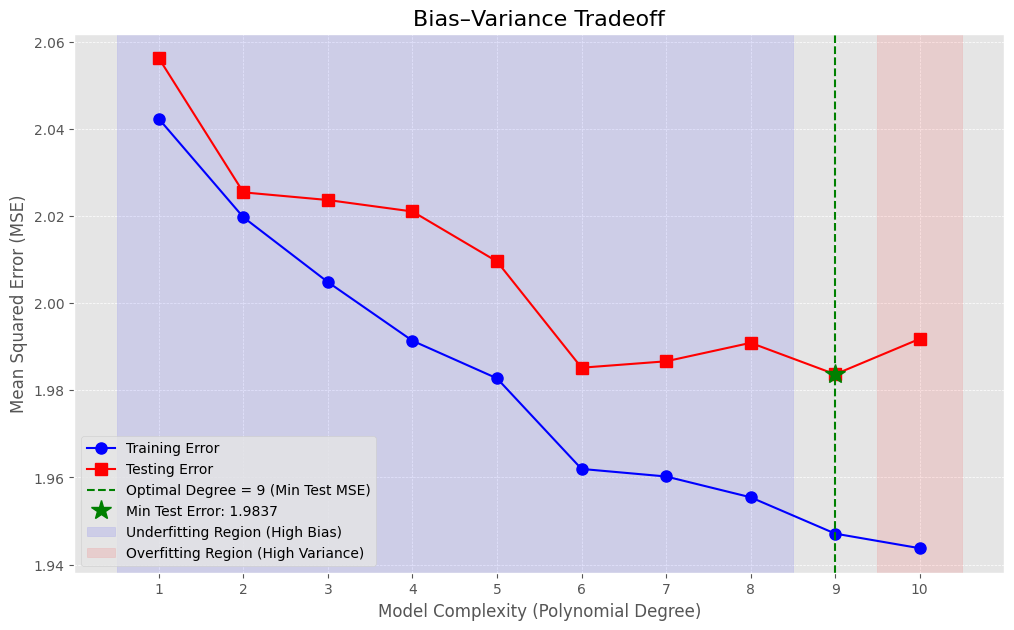

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


# Matplotlib settings
plt.style.use('ggplot') # ggplot is a ready package for the style for graph
plt.rcParams['figure.figsize'] = (10, 6) # we want to make all of the graphs at same size w=10inch height=6inch 
#rcparams is a dictionary where global settings of matplotlib exist (rc=runtime configuration ) --> matplotlib çalışırken hangi ayarları kullancak
print("Libraries successfully loaded.")

# --- Step 1: Data Loading and Preparation ---
print("\n--- Step 1: Data Loading and Preparation ---")

# Important notes for reading the dataset from UCI:
# 1. Separator (;) 
# 2. Decimal delimiter (,) 
# 3. Missing values are indicated by -200

try: 
    # Adjust file path accordingly
    df = pd.read_csv(
        r'C:\Users\Berat Koncuk\OneDrive - Arup\Masaüstü\GitHub\CE49X_Fall2025_Koncuk_Berat\Lab5\AirQualityUCI.csv',sep=';', decimal=',')
    print(f"Dataset successfully loaded. Original shape: {df.shape}")
except FileNotFoundError:
    print("ERROR: 'AirQualityUCI.csv' file not found.")
    print("Please download it from the UCI link and place it in the same folder as the notebook.")
    exit()

# Replaces missing value indicators (-200) with NaN
df.replace(-200, np.nan, inplace=True)

# Select relevant columns
features = ['T', 'RH', 'AH'] # Yani machine learning modeli bu 3 değişkenle CO’yu tahmin edecek 
#T (Temperature); RH (Relative Humidity); AH (Absolute Humidity) ---> There are X. in func.
target = 'CO(GT)' # Tahmin etmeye çalıştığı değişken ---> this is y 
columns_to_use = features + [target] # combining lists so that we can use it next time by selecting columns 

data = df[columns_to_use].dropna() # Keeps only relevant columns and remove rows with missing values
print(f"Missing values (-200) handled. New shape: {data.shape}") # data shape numpy array ya da df in boyutlarını veriyo  

# Separates features (X) and target (y)
X = data[features] # takes input variables from the clean data set
y = data[target]

# Splits data into Training (70%) and Testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # test_size Verinin ½30 unu test oalrak ayır diyo
#Training sets are x_train y_train  and Splitting is randomly 
# random_state=42 : Rastgeleliği hep aynı şekilde başlat böylece hep aynı bölme olsun ki her çalıştırdığımda farklı rastgele bölme olmasın
# 42  Önemli olan sayı değil → sabit olması. “favori seed” (Hitchhiker’s Guide to the Galaxy kitabından ilham 42 hayat evren ve her şeyin başlangıcı olarak geçiyormuş kitapta)

print(f"Data successfully split: {len(X_train)} training samples, {len(X_test)} testing samples.")

# --- Step 2: Model Training and Error Calculation ---
print("\n--- Step 2: Model Training and Error Calculation ---")

degrees = range(1, 11)  # Polynomial degrees from 1 to 10 ; polinom derecelerini belirliyoruz ve modeli daha karmaşıklaştırırsak olcak hataları inceliyoruz 
train_errors = [] # Later we will add training errors here 
test_errors = []

print(f"Training polynomial regression models for degrees 1 to {degrees[-1]}...")

for d in degrees: # loop for every degree of polynoom degree 1--> too simple only learns base knowledge (high bias)  10--> too complex ezberci (high variance)
    # Create a pipeline for polynomial feature generation and linear regression
    pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=d, include_bias=False)), # burda input değişkenleri polinomial olarak genişletiyor Örnek olarak d 2 için T², RH², AH², TRH, TAH, RH*AH ekliyor.
        # model can learn complex relations now 
        ('linear_regression', LinearRegression()) # says make it first polynomial then learn 
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)  # we make it learn with xtrain ytrain 

    # Calculating TRAINing Error (MSE)
    y_train_pred = pipeline.predict(X_train) # x üzerindeki tahminlerini alıyoruz
    train_mse = mean_squared_error(y_train, y_train_pred) # gerçek ile tahmini kıyaslıyoruz ve farkların karesini alıp ortalamasını alıyoz 
    train_errors.append(train_mse) # we are adding the train errror to the list we created before for the graph

    # Calculating TESTing Error (MSE)
    y_test_pred = pipeline.predict(X_test) # bu sefer görmediği veriye test olarak prediction yaptırıyoz
    test_mse = mean_squared_error(y_test, y_test_pred) 
    test_errors.append(test_mse) # test errors is the real world performance of model

print("All models have been trained and errors calculated.")

# --- Step 3: Validation Curve Plot ---
print("\n--- Step 3: Validation Curve Plot ---")

plt.figure(figsize=(12, 7)) # creates a new matplotlib figure with 12 widht 
plt.plot(degrees, train_errors, 'o-', label='Training Error', color='blue', markersize=8) #degrees burda x ekseni ; train errors y  
# o- işaret şekli olarak seçtik 
plt.plot(degrees, test_errors, 's-', label='Testing Error', color='red', markersize=8) # s- kare çizgi işaret şekli kullandık 

# Find the best degree (minimum test error)
best_degree = degrees[np.argmin(test_errors)] # np.argmin en iyi dereceyi bulmada kullanıyoz. test errors listesindeki en küçük değerin indexi 
min_test_error = np.min(test_errors) # gives the min test error value

# Highlighting the best point on the graph
plt.axvline(x=best_degree, linestyle='--', color='green', label=f'Optimal Degree = {best_degree} (Min Test MSE)') # axvline dikey çizgi çiziyo x=best degreede
plt.plot(best_degree, min_test_error, 'g*', markersize=15, label=f'Min Test Error: {min_test_error:.4f}') # yıldız işareti ile min noktayı işaretliyoruz g* ile 

# Axis labels and title
plt.xlabel('Model Complexity (Polynomial Degree)', fontsize=12) # we are naming the x axis 
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('Bias–Variance Tradeoff', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # true says open the grid lines ; both diye tanımladık hem major hem minor çizgiler çizip kullanabilelim
plt.xticks(degrees) # x eskenindeki değerleri polynom degreedeki sayılar yapıyoz 1,2,3...10 gibi 
#plt.yscale('log')  # Log scale for better visibility when errors differ significantly

# Annotate regions
plt.axvspan(0.5, best_degree - 0.5, alpha=0.1, color='blue', label='Underfitting Region (High Bias)') #x-ekseninde 0.5 ile (best_degree - 0.5) arasında kalan kısmı mavi boyuyoz.
plt.axvspan(best_degree + 0.5, degrees[-1] + 0.5, alpha=0.1, color='red', label='Overfitting Region (High Variance)')

# Legend order adjustment
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 3, 4, 5]  
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

print(f"Plot generated. Optimal polynomial degree (minimum test error): {best_degree}.")
plt.show()

💡 Bonus (Optional)

Try using cross-validation (cross_val_score) instead of a simple train/test split. Compare results and comment on any differences in the optimal model degree.

Kütüphaneler yüklendi.

--- Adım 1: Veri Yükleme ve Hazırlama ---
Veri seti yüklendi. Orijinal şekil: (9471, 17)
Eksik veriler (-200) temizlendi. Yeni şekil: (7344, 4)
Toplam 7344 örnek CV için kullanılacak.

--- 💡 BONUS: Çapraz Doğrulama (Cross-Validation) ---
Model performansı, 5-katmanlı (5-fold) CV ile değerlendiriliyor...
  Derece 1: Ortalama CV Hatası (MSE) = 2.2073 (+/- 0.5934)
  Derece 2: Ortalama CV Hatası (MSE) = 2.2539 (+/- 0.6314)
  Derece 3: Ortalama CV Hatası (MSE) = 2.2912 (+/- 0.6291)
  Derece 4: Ortalama CV Hatası (MSE) = 2.4286 (+/- 0.5672)
  Derece 5: Ortalama CV Hatası (MSE) = 2.9923 (+/- 0.7126)
  Derece 6: Ortalama CV Hatası (MSE) = 2.6087 (+/- 0.6379)
  Derece 7: Ortalama CV Hatası (MSE) = 3.3143 (+/- 1.2350)
  Derece 8: Ortalama CV Hatası (MSE) = 3.6870 (+/- 1.9820)
  Derece 9: Ortalama CV Hatası (MSE) = 3.0770 (+/- 0.9205)
  Derece 10: Ortalama CV Hatası (MSE) = 6.1352 (+/- 5.7140)
Çapraz doğrulama tamamlandı.

--- Bonus: CV Hata Grafiği Çiziliyor ---


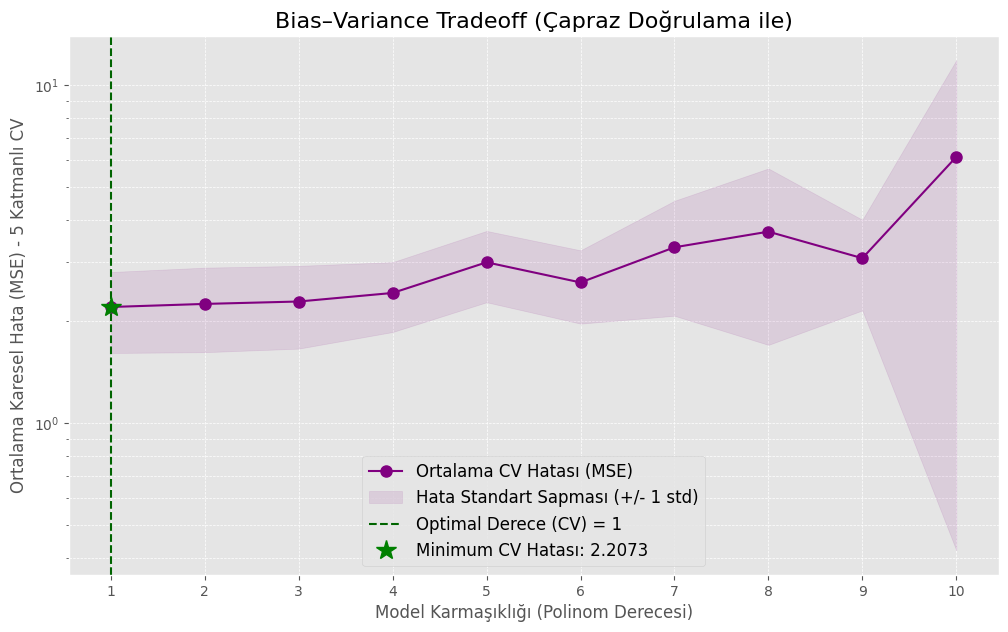


--- Bonus: Yorumlar ---
**Optimal Model Derecesi:** 5-katmanlı Çapraz Doğrulama (CV) sonucuna göre, en düşük ortalama test hatasını (MSE) veren model **1. derece** polinomdur (Minimum Ortalama Hata: 2.2073).

**Neden CV Kullanılır?**
 * **Güvenilirlik:** Basit bir 'train/test split' (eğitim/test ayırma) yapmak yerine CV kullanmak, model performansını daha güvenilir bir şekilde ölçer. Basit ayırmada, test setine şans eseri 'kolay' veya 'zor' örnekler denk gelebilir ve bu da en iyi model seçiminizi yanıltabilir.
 * **Veri Kullanımı:** CV, veriyi tek bir kez bölmek yerine (örn: 5 kez) farklı şekillerde böler ve 5 farklı test hatasının ortalamasını alır. Bu, modelin genelleme yeteneği hakkında bize daha istikrarlı bir fikir verir.
 * **Sonuç:** Grafikteki mor çizgi, 'U' şeklini korumaktadır. Düşük dereceler (yüksek bias) ve yüksek dereceler (yüksek varyans) hala yüksek hataya sahiptir. CV, bize bu 'U' eğrisinin en alt noktasının (1. derece) nerede olduğuna dair daha güvenilir bir tahmin s

In [ ]:
# --- Adım 0: Gerekli Kütüphaneler ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline



# Matplotlib ayarları
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

print("Kütüphaneler yüklendi.")


# --- Adım 1: Veri Yükleme ve Hazırlama (CV için gereklidir) ---
print("\n--- Adım 1: Veri Yükleme ve Hazırlama ---")

try:
    # Dosya adını kontrol et
    df = pd.read_csv(r'C:\Users\Berat Koncuk\OneDrive - Arup\Masaüstü\GitHub\CE49X_Fall2025_Koncuk_Berat\Lab5\AirQualityUCI.csv',sep=';', decimal=',')
    
    print(f"Veri seti yüklendi. Orijinal şekil: {df.shape}")
except FileNotFoundError:
    print("HATA: 'AirQualityUCI.csv' dosyası bulunamadı.")
    exit()

# -200 değerlerini NaN (Not a Number) olarak değiştir
df.replace(-200, np.nan, inplace=True)

# İlgili sütunları seç
features = ['T', 'RH', 'AH']
target = 'CO(GT)'
columns_to_use = features + [target]

# Sadece ilgili sütunları al ve eksik verileri (NaN) içeren satırları temizle
data = df[columns_to_use].dropna()
print(f"Eksik veriler (-200) temizlendi. Yeni şekil: {data.shape}")

# Özellik (X) ve hedef (y) değişkenlerini ayır
# !! ÖNEMLİ: CV için TÜM VERİ SETİNİ kullanırız.
# train_test_split YAPILMAZ.
X = data[features]
y = data[target]

print(f"Toplam {len(X)} örnek CV için kullanılacak.")


# --- BONUS: Çapraz Doğrulama (Cross-Validation) ---
print("\n--- 💡 BONUS: Çapraz Doğrulama (Cross-Validation) ---")
print("Model performansı, 5-katmanlı (5-fold) CV ile değerlendiriliyor...")

degrees = range(1, 11)  # 1'den 10'a kadar olan dereceler
cv_errors = []          # Ortalama hataları tutacak liste
cv_errors_std = []      # Hataların standart sapmasını tutacak liste

for d in degrees:
    # 1. Pipeline (İş Akışı) oluştur:
    #    a. Polinom özellikleri oluştur
    #    b. Doğrusal Regresyon modelini eğit
    pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=d, include_bias=False)),
        ('linear_regression', LinearRegression())
    ])
    
    # 2. 5-katmanlı çapraz doğrulama yap (cv=5)
    #    'scoring' olarak 'neg_mean_squared_error' kullanılır.
    #    Scikit-learn 'yüksek skor iyidir' mantığıyla çalışır.
    #    Biz hatayı (MSE) minimize etmek istediğimiz için, negatif MSE'yi maksimize ederiz.
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    
    # 3. Skorları pozitife çevir (çünkü onlar negatif MSE idi) ve ortalamasını al
    mean_error = -np.mean(scores)
    std_error = np.std(scores) # 5 fold'un standart sapması
    
    cv_errors.append(mean_error)
    cv_errors_std.append(std_error)
    
    print(f"  Derece {d}: Ortalama CV Hatası (MSE) = {mean_error:.4f} (+/- {std_error:.4f})")

print("Çapraz doğrulama tamamlandı.")

# En iyi dereceyi bul (CV'ye göre en düşük ortalama hata)
best_degree_cv = degrees[np.argmin(cv_errors)]
min_cv_error = np.min(cv_errors)

# --- Bonus: CV Hata Grafiği ---
print("\n--- Bonus: CV Hata Grafiği Çiziliyor ---")

plt.figure(figsize=(12, 7))
# Ortalama CV hatalarını çiz
plt.plot(degrees, cv_errors, 'o-', label='Ortalama CV Hatası (MSE)', color='purple', markersize=8)

# Hata çubuklarını (standart sapma) gölgelendirme olarak ekle
# Bu, her derece için performansın ne kadar "tutarlı" olduğunu gösterir
cv_errors_upper = np.array(cv_errors) + np.array(cv_errors_std)
cv_errors_lower = np.array(cv_errors) - np.array(cv_errors_std)
plt.fill_between(degrees, cv_errors_lower, cv_errors_upper, color='purple', alpha=0.1, label='Hata Standart Sapması (+/- 1 std)')


# En iyi dereceyi dikey bir çizgi ile göster
plt.axvline(x=best_degree_cv, linestyle='--', color='darkgreen', label=f'Optimal Derece (CV) = {best_degree_cv}')
# En iyi noktayı bir yıldızla işaretle
plt.plot(best_degree_cv, min_cv_error, 'g*', markersize=15, label=f'Minimum CV Hatası: {min_cv_error:.4f}')

# Grafik ayarları
plt.xlabel('Model Karmaşıklığı (Polinom Derecesi)')
plt.ylabel('Ortalama Karesel Hata (MSE) - 5 Katmanlı CV')
plt.title('Bias–Variance Tradeoff (Çapraz Doğrulama ile)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(degrees)
plt.yscale('log') # Logaritmik ölçek, hatalar arası farkı daha iyi gösterir
plt.show()



Step 4 — Discussion


1. Which polynomial degree gives the best generalization? 
    When the train/test split (70%-30%) was used, the Test Error curve reached its lowest point at order 9 (Chart 1).However, when the more reliable method, 5-Fold Cross Validation (Bonus Task), was used, the Mean CV Error curve reached its lowest point at order 1 (Chart 2).

    Bizim kod, cross_val_score kullanarak 5 farklı test setinin ortalamasını aldı (mor çizgi). Bu eğrinin en alt noktası (kodda best_degree olarak hesaplanan ve yeşil yıldızla işaretlenen yer), modelin ne çok basit (underfit) ne de çok karmaşık (overfit) olduğu ideal noktadır.

2. Describe how the training and testing errors change as degree increases.
    As the polynomial order increases, training error decreases continuously as the model becomes more complex and memorizes the data. Testing error, on the other hand, first decreases and then increases, indicating a low degree of underfitting and a high degree of overfitting.
    
3. Explain how bias and variance manifest in this dataset.
    In this dataset, according to Chart 2 (Bonus), the most reliable region, the High Bias (Underfitting) region, is almost non-existent; the simplest model, degree 1, already performed best. High Variance (Overfitting) begins after order 1; every model from order 2 onwards loses its ability to generalize, increasing the test error (purple line).

4. How might sensor noise or missing data affect the bias–variance tradeoff?
    Sensor noise and missing data add extra randomness to the model, increasing variance. Higher-order models, in particular, learn from the noise and overfit more. At the same time, inaccurate or incomplete information reduces the model's ability to capture true relationships, and bias can increase. Consequently, noise distorts the tradeoff, leading to poorer generalization.
    